***
# <span style="color:black;font-size:1.5em">Arpan Shrivastava</span>
***

***
# <span style="color:indigo;font-size:1.5em">Importing Libraries</span>
***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [2]:
class EDA:
    
    def __init__(self, data): 
        self.data=data
        pass  
    def heatmap(self,d):
        return sns.heatmap(d, cmap="flare", annot=True)
    def cp(self, xv,data):
        return sns.countplot(x=xv, data=data, order = data[xv].value_counts().index, palette='flare')

In [3]:
accept=pd.read_csv('accepted_2007_to_2018Q4.csv')
reject=pd.read_csv('rejected_2007_to_2018Q4.csv')

***
# <span style="color:indigo;font-size:1.5em">Data Cleaning</span>
***

In [4]:
# We will drop rows which have loan_status other than Fully Paid or Charged Off or Current 
accept = accept[(accept['loan_status'] == 'Fully Paid') | (accept['loan_status'] == 'Charged Off')| (accept['loan_status'] == 'Current')]


In [5]:
# Removing columns with more than 50% of the missing values
((accept.isnull().sum()/len(accept))*100).sort_values(ascending=False)

member_id                                     100.000000
orig_projected_additional_accrued_interest     99.703592
hardship_end_date                              99.610231
hardship_start_date                            99.610231
hardship_type                                  99.610231
                                                 ...    
pub_rec                                         0.000000
open_acc                                        0.000000
fico_range_high                                 0.000000
fico_range_low                                  0.000000
id                                              0.000000
Length: 151, dtype: float64

In [6]:
accept = accept[accept.columns[((accept.isnull().sum()/len(accept))*100 < 50)].to_list()]

In [7]:
# Just keeping some significant features
features = ['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'application_type',
                    'initial_list_status', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'loan_status', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 
                    'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status']
accept=accept[features]

In [8]:
accept.shape

(2223627, 28)

***
# <span style="color:indigo;font-size:1.5em">Exploratory Data Analysis</span>
***

### <span style="color:BlueViolet;font-size:1.5em">Correlation</span>


In [9]:
# Creating dummy variables for categorical column loan_status
accept_dummies = pd.get_dummies(accept, columns=['loan_status'])

<AxesSubplot:>

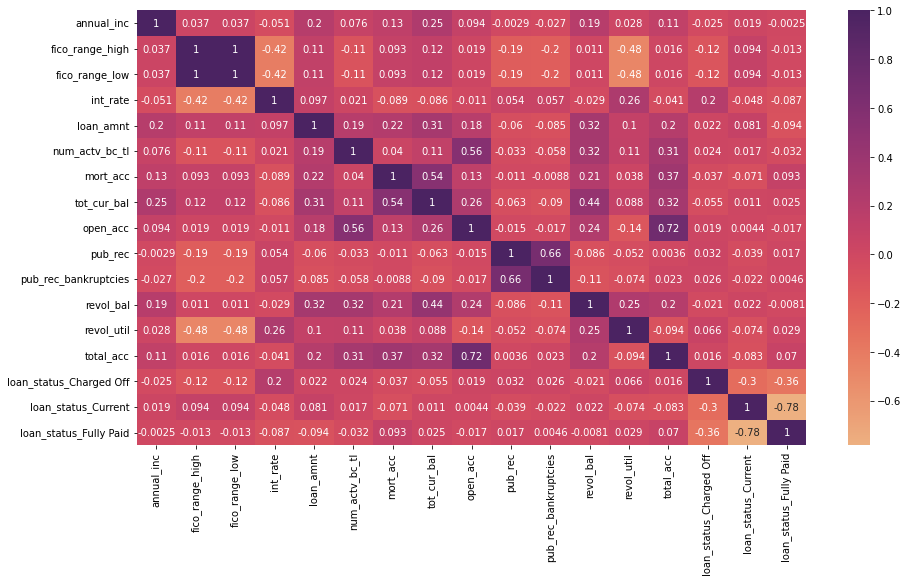

In [10]:
#class
r=EDA(accept_dummies)
r.heatmap(accept_dummies.corr())

<span style="color:CornflowerBlue;font-size:1.2em">It appears that fico_range_high, fico_range_low and int_rate are significantly correlated to the loan_status_Charged Off, loan_status_Current and loan_status_Fully Paid</span>

***
### <span style="color:BlueViolet;font-size:1.5em">1. Number of Rejected Loan Applications per State</span>
<span style="color:CornflowerBlue;font-size:1.2em">California saw the most number of rejects amongst all the states, followed by Texas and Florida.</span>

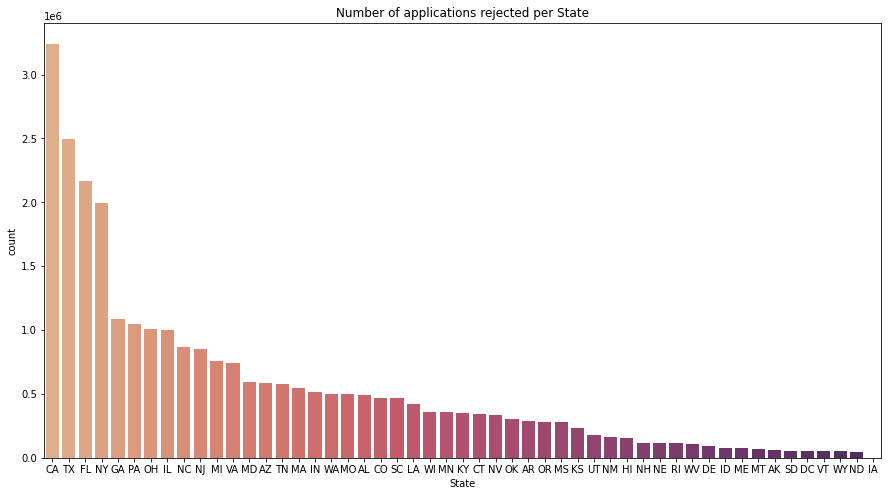

In [11]:
sns.countplot(x='State', data=reject, order = reject['State'].value_counts().index, palette='flare')
plt.title('Number of applications rejected per State')
plt.show()

***
### <span style="color:BlueViolet;font-size:1.5em">2. Count of Loan Status</span>
***


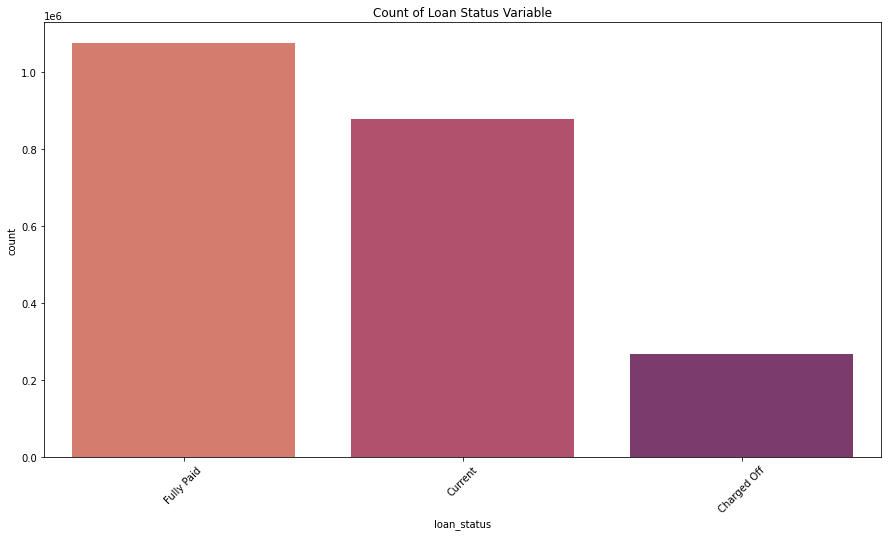

In [12]:
sns.countplot(x='loan_status', data=accept, order = accept['loan_status'].value_counts().index, palette='flare')
plt.title('Count of Loan Status Variable')
plt.xticks(rotation=45)
plt.show()

***
### <span style="color:BlueViolet;font-size:1.5em">3. Annual Income Distribution</span>
***

In [13]:
accept['annual_inc'].describe()

count    2.223627e+06
mean     7.799508e+04
std      1.131392e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

<AxesSubplot:ylabel='Density'>

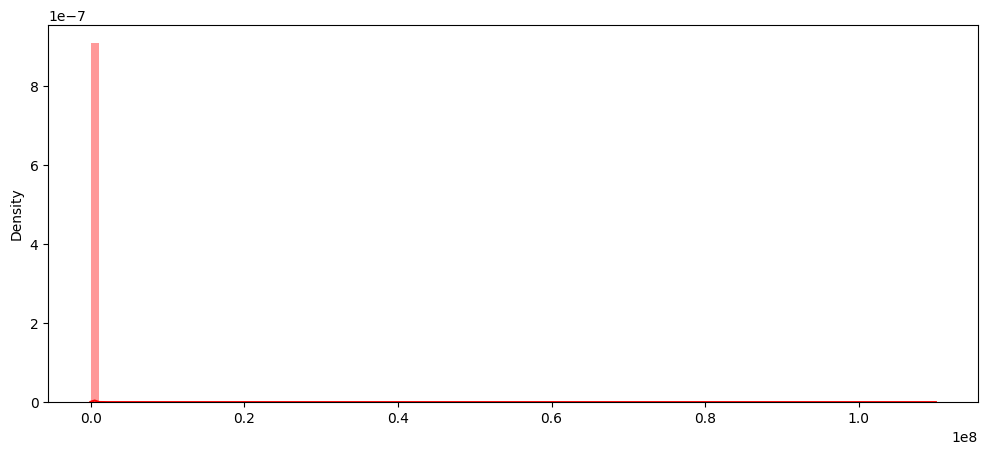

In [14]:
plt.figure(figsize=(12,5), dpi=100)

sns.distplot(x=accept['annual_inc'], bins=100, color='red')


In [15]:
len(accept[accept['annual_inc']>275000]['annual_inc'])*100/len(accept['annual_inc'])

0.9327103871287765

***
<span style="color:CornflowerBlue;font-size:1.2em">Since the distribution of annual income is highly right skewed we remove the rows with annual income more than 275000 because they appear to be outliers and are responsible for the skewness</span>
***

In [16]:
accept = accept[accept['annual_inc'] <= 275000]


<Figure size 1560x1560 with 0 Axes>

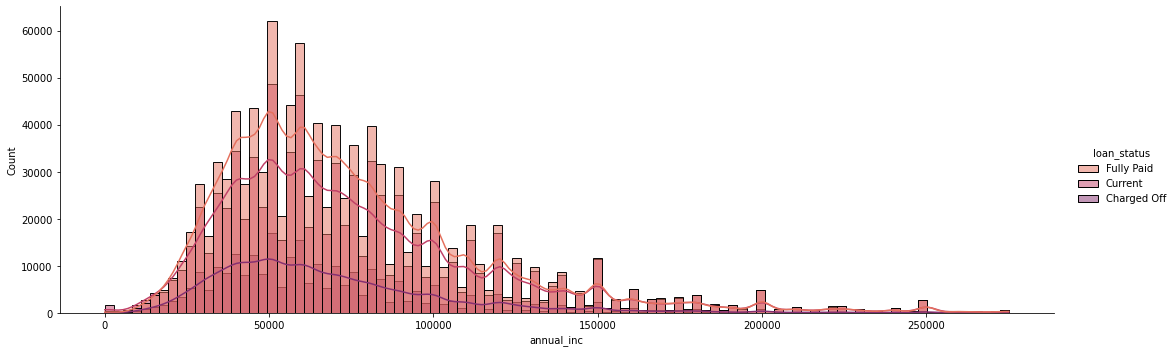

In [17]:
plt.figure(figsize=(12,12), dpi=130)

sns.displot(data = accept,x='annual_inc', bins=100, \
            hue='loan_status',height=5, aspect=3, kde=True, palette='flare')
plt.show()

In [18]:
accept.groupby('loan_status')['annual_inc'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,267168.0,68318.715731,36803.672225,0.0,43000.0,60000.0,84000.0,275000.0
Current,868458.0,76152.260905,42425.570499,0.0,47000.0,66000.0,95000.0,275000.0
Fully Paid,1067261.0,74385.606534,39914.675252,0.0,46862.0,65000.0,91630.0,275000.0


<span style="color:CornflowerBlue;font-size:1.2em">The median income for people who fully paid the loan amount is $6000 more than people who were Charged Off.</span>
***

***
### <span style="color:BlueViolet;font-size:1.5em">4. Fico Distribution</span>


<span style="color:CornflowerBlue;font-size:1.2em">Taking the average of fico_range_high and fico_range_low, to get an approximate single fico value for the simplicity.</span>


In [19]:
accept['fico'] = (accept['fico_range_high'] + accept['fico_range_low']) / 2
accept = accept.drop(['fico_range_high', 'fico_range_low'], axis=1)


In [20]:
accept.shape

(2202887, 27)

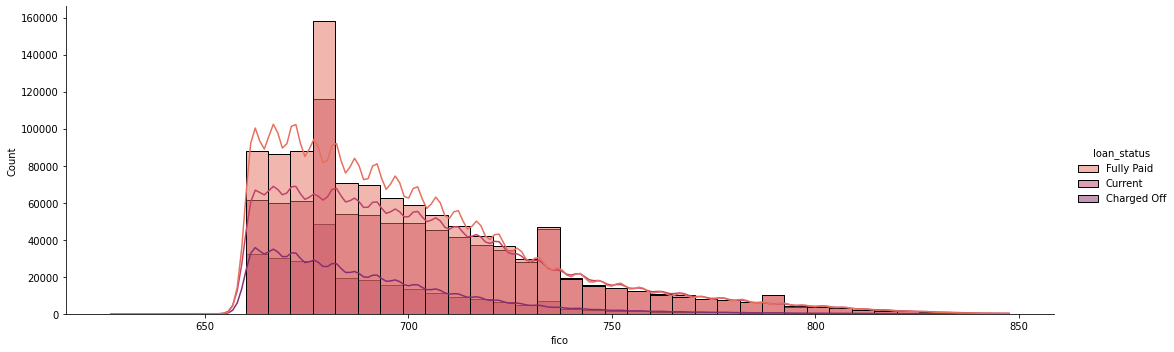

In [21]:
sns.displot(data=accept, x='fico',height=5, aspect=3, hue='loan_status',bins=40, kde=True, palette='flare')

***
<span style="color:CornflowerBlue;font-size:1.2em">We can see a clear difference in the box plot below between the median fico score for the ones who Fully Paid the loan and the ones who were Charged Off.</span>


In [22]:
accept.groupby('loan_status')['fico'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,267168.0,689.818440,25.926254,662.0,672.0,682.0,702.0,847.5
Current,868458.0,704.481806,34.455168,662.0,677.0,697.0,722.0,847.5
Fully Paid,1067261.0,700.155332,32.780249,627.0,677.0,692.0,717.0,847.5


<AxesSubplot:xlabel='fico', ylabel='loan_status'>

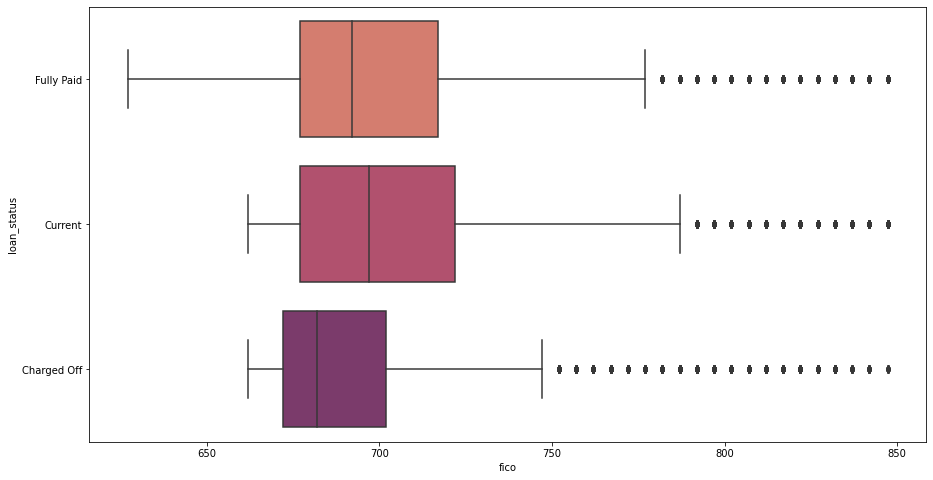

In [23]:
sns.boxplot(data=accept, y='loan_status', x='fico', palette='flare')

***
### <span style="color:BlueViolet;font-size:1.5em">5. Sub Grade Distribution</span>


<AxesSubplot:xlabel='sub_grade', ylabel='count'>

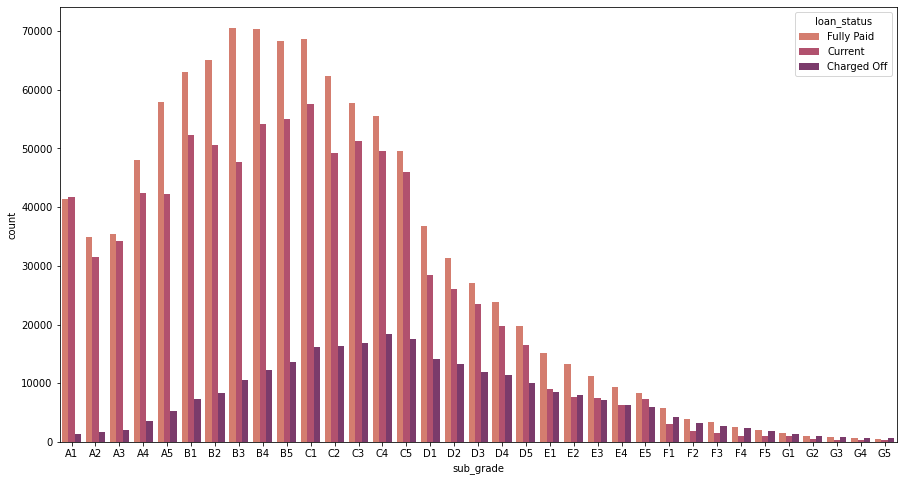

In [24]:
sns.countplot(x='sub_grade',data=accept,order = sorted(accept['sub_grade'].unique()),\
              palette='flare' ,hue='loan_status')


<span style="color:CornflowerBlue;font-size:1.2em">We can see a clear pattern in the above graph where in as the sub_grade decreases, the ratio of Fully Paid to Charged Off increases. This is consistent with the grading policy.</span>
***

***
### <span style="color:BlueViolet;font-size:1.5em">6. Percentage charged off per home_ownership category</span>


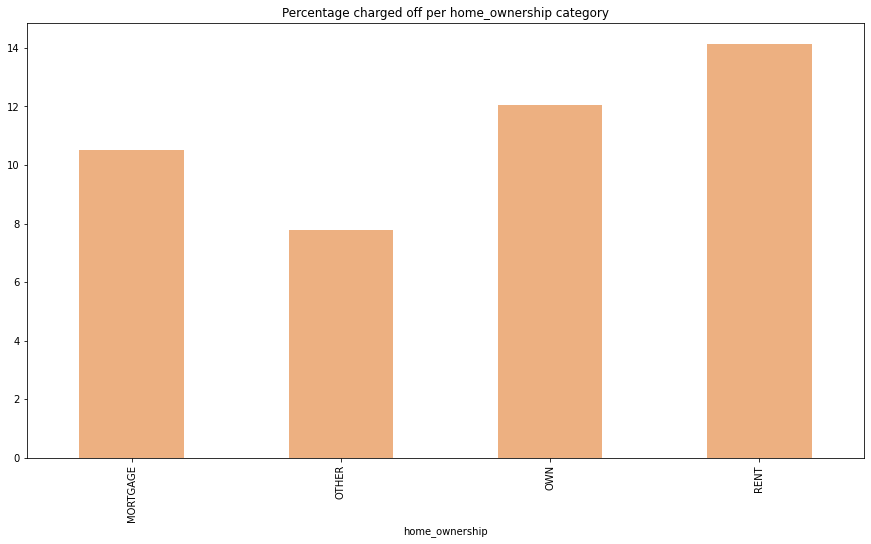

In [25]:
accept['home_ownership'] = accept['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

charged_off = accept[accept['loan_status']=="Charged Off"].groupby("home_ownership").count()['loan_status']
fully_paid = accept[accept['loan_status']=="Fully Paid"].groupby("home_ownership").count()['loan_status']
Current = accept[accept['loan_status']=="Current"].groupby("home_ownership").count()['loan_status']

percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid + Current)
percentage_charged_off.plot(kind='bar', cmap='flare', sort_columns = True)
plt.title("Percentage charged off per home_ownership category");

<span style="color:CornflowerBlue;font-size:1.2em">We can see that the applicants who pay rent for residential purposes has the most percentage of charged off loans. This maybe due to the fact that people who can't afford to buy their own homes default on their loans the most.</span>
***

***
### <span style="color:BlueViolet;font-size:1.5em">7. Percentage charged off per application_type category</span>


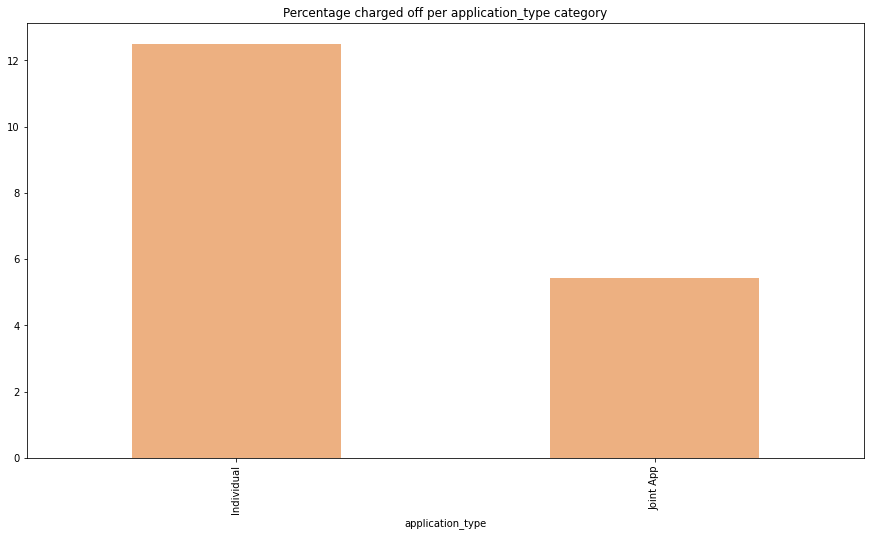

In [26]:
charged_off = accept[accept['loan_status']=="Charged Off"].groupby("application_type").count()['loan_status']
fully_paid = accept[accept['loan_status']=="Fully Paid"].groupby("application_type").count()['loan_status']
Current = accept[accept['loan_status']=="Current"].groupby("application_type").count()['loan_status']

percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid + Current)
percentage_charged_off.plot(kind='bar', cmap='flare')
plt.title("Percentage charged off per application_type category");

<span style="color:CornflowerBlue;font-size:1.2em">It is clearly visible that the individual application type has significantly more percent charged off than that of Join application</span>
***

***
### <span style="color:BlueViolet;font-size:1.5em">8. Interest Rate per Loan Status</span>


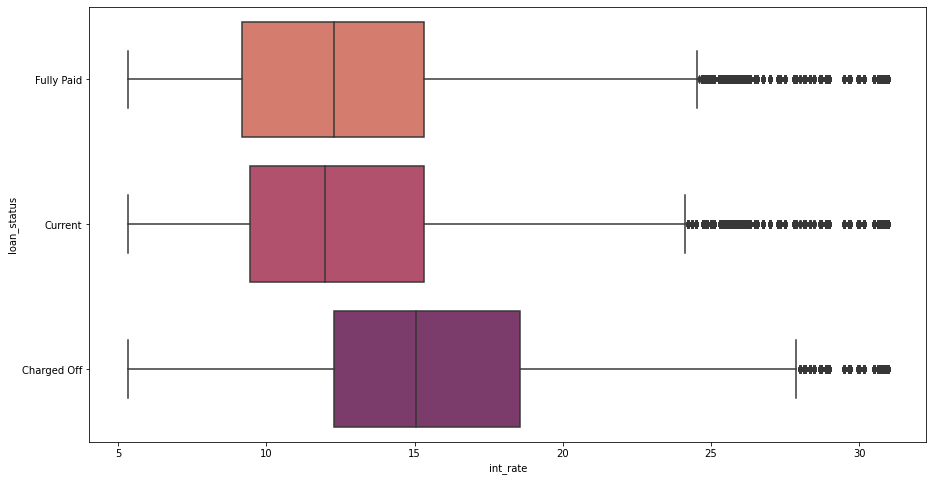

In [27]:
sns.boxplot(data=accept, y='loan_status', x='int_rate', palette='flare');


<span style="color:CornflowerBlue;font-size:1.2em">We can see that the median of interest rates for Charged Off loans is the highest amongst all the categories. High interest rate significantly increases the risk of a loan default.</span>
***

***
### <span style="color:BlueViolet;font-size:1.5em">9. Loan Amount per Loan Status</span>


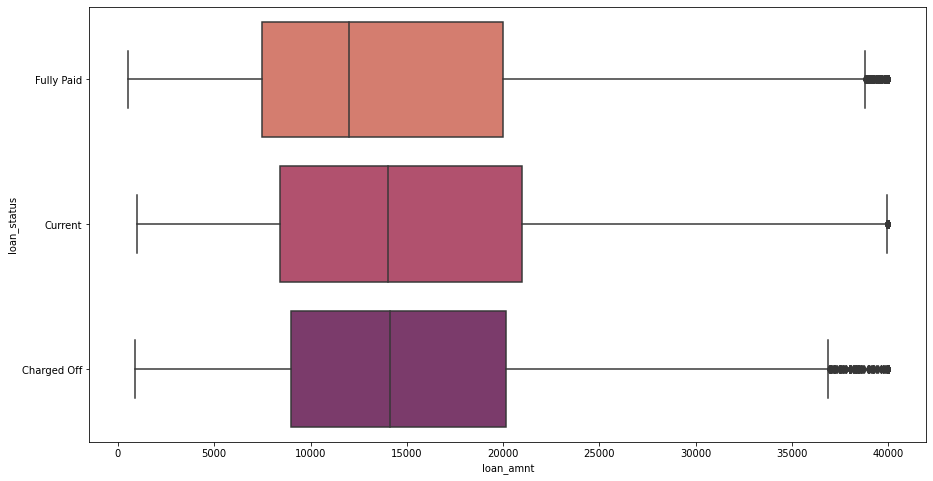

In [28]:
sns.boxplot(data=accept, y='loan_status', x='loan_amnt', palette='flare');


<span style="color:CornflowerBlue;font-size:1.2em">In the above box plot, we can see the median loan amount for Charged Off loans is significantly more than that of Fully Paid. High amount of borrowed money would result in higher interest rate keeping the rate constant, which would eventually result in more defaults.</span>
***

***
### <span style="color:BlueViolet;font-size:1.5em">10. Percentage charged off per term category</span>


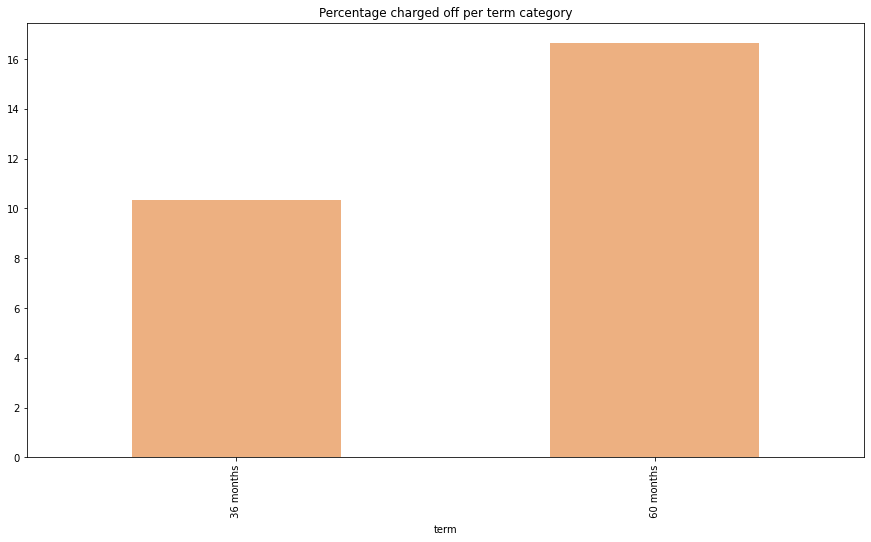

In [29]:
charged_off = accept[accept['loan_status']=="Charged Off"].groupby("term").count()['loan_status']
fully_paid = accept[accept['loan_status']=="Fully Paid"].groupby("term").count()['loan_status']
Current = accept[accept['loan_status']=="Current"].groupby("term").count()['loan_status']

percentage_charged_off = (charged_off * 100)/(charged_off + fully_paid + Current)
percentage_charged_off.plot(kind='bar', cmap='flare')
plt.title("Percentage charged off per term category");

<span style="color:CornflowerBlue;font-size:1.2em">Customers whose loan term was 60 months were almost twice the percentage charged off than that of customers with 36 months loan term.</span>
***



***
### <span style="color:BlueViolet;font-size:1.5em">10. Distribution of Total Current Balance</span>

In [30]:
# To remove the outliers
accept = accept[accept['tot_cur_bal'] < 1000001]

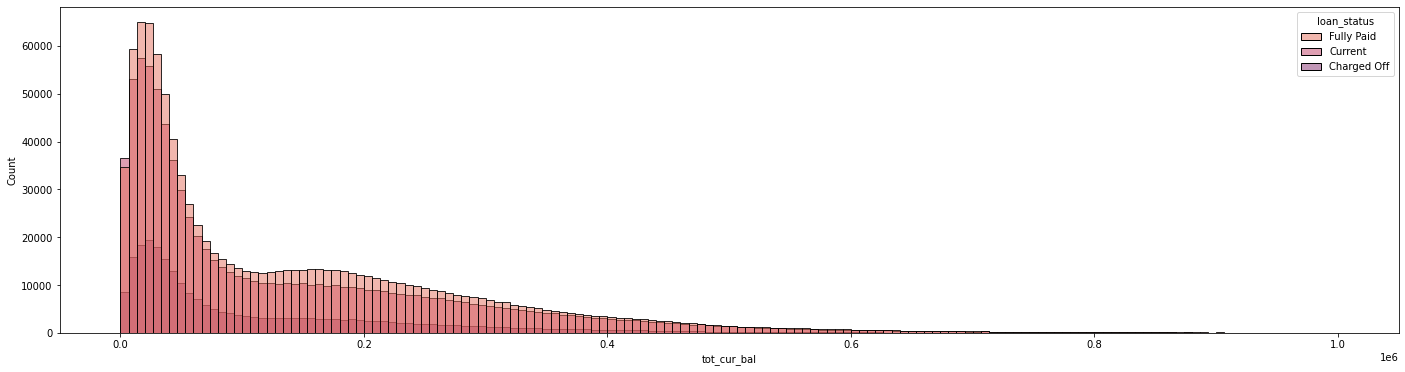

In [37]:
plt.figure(figsize=(24,6))
sns.histplot(data=accept, x='tot_cur_bal', bins=150, hue='loan_status', palette='flare');

In [38]:
accept.groupby('loan_status')['tot_cur_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,256769.0,116646.433366,127232.860489,0.0,27329.00,60742.0,173548.0,999823.0
Current,867476.0,138983.087937,147727.477891,0.0,28379.75,76566.0,213566.0,999856.0
Fully Paid,1009218.0,141534.481209,145217.724338,0.0,29796.00,85688.5,216058.0,999950.0


<span style="color:CornflowerBlue;font-size:1.2em">We can see that the mean of total current balance for Charged Off loans is around $25000 lower than that of customers who fully paid the loan.</span>
***


***
# <span style="color:indigo;font-size:1.5em">Summary</span>
***

Looking at the visualizations and diving deep into our analysis, we have some recommendations for loan providers to follow before sanctioning loan to the individuals.
1. There is a high chance that a person who lives in California might defaulton their loan
2. The mean of annual income who fully paid the loan is approximately 74385 dollars which is 6000 dollars more than that of mean of annual income of customers who were Charged Off which is 68318 dollars
3. Fico score less than 700 could significantly increase the chance of the customer defaulting on their loan
4. Most of the deafults falls into subgrades which range from B4 to D4. While sanctioning loan, target customers who fall above B4 sub grade
5. We can see that the applicants who pay rent for residential purposes has the most percentage of charged off loans. This maybe due to the fact that people who can't afford to buy their own homes default on their loans the most.
6. It is clearly visible that the individual application type has significantly more percent charged off than that of Join application
7. We can see that the median of interest rates for Charged Off loans is the highest amongst all the categories. High interest rate significantly increases the risk of a loan default.
8. The median loan amount for Charged Off loans is significantly more than that of Fully Paid. High amount of borrowed money would result in higher interest rate keeping the rate constant, which would eventually result in more defaults.
9. Customers whose loan term was 60 months were almost twice the percentage charged off than that of customers with 36 months loan term.
10. While making a decision of providing loan, it will wise to look at the total current balance. The mean of total current balance for Charged off customers is approximately 116,646 dollars where as the mean of total current balance for customers who full paid their loans is 141,534 dollars